<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #2c3e50;
    margin-top: 20px;
    letter-spacing: 1px;
">
    🐶🐱 Dog and Cat Classification
</h1>

### ---------------------------------
### Author: `Ali Hassan`
### Project: Cats vs Dogs Classification

**Dataset:** [ Cats vs Dogs (Kaggle)](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/data)



- **Total images:** ~25,000 (cats + dogs)  
- **Split:** Train / Validation / Test  

---

## 🧰 Steps in This Notebook

1. **Data Loading & Preprocessing**  
   - Resize images to **128×128**  
   - Normalize pixel values to `[0, 1]`  
   - Train/Val/Test split  

2. **Model Architecture**  
   - `Conv2D → MaxPooling → Dropout → Dense`  
   - Final layer: `Dense(1, activation="sigmoid")`  

3. **Training**  
   - Loss: `binary_crossentropy`  
   - Optimizer: `adam`  
   - Metrics: `accuracy`  

4. **Evaluation & Visualization**  
   - Plot **loss & accuracy curves**  
   - Show random predictions with images  

5. **Prediction on New Images**  
   - Upload your own cat/dog image  
   - Display model’s prediction & confidence  

---

## 🔗 Useful Links

- 📑 **Dataset:** [Kaggle — Microsoft Cats vs Dogs](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/data)  
- 📚 **TensorFlow Docs:** [Image Classification Guide](https://www.tensorflow.org/tutorials/images/classification)  
- 🧠 **Model Visualization:** [Keras Model Plot](https://keras.io/api/utils/model_plotting_utils/)  
- 🎨 **Matplotlib Docs:** [Customizing Plots](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

---


In [1]:
# ============================================================
#  IMPORT LIBRARIES
# ============================================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Data and Preprocessing

TensorFlow version: 2.10.1
Num GPUs Available:  1
Found 24824 files belonging to 2 classes.
Using 19860 files for training.
Found 24824 files belonging to 2 classes.
Using 4964 files for validation.
Epoch 1/30
621/621 [==============================] - 203s 293ms/step - loss: 0.6180 - accuracy: 0.6539 - val_loss: 0.5736 - val_accuracy: 0.6928
Epoch 2/30
621/621 [==============================] - 181s 291ms/step - loss: 0.5307 - accuracy: 0.7359 - val_loss: 0.4642 - val_accuracy: 0.7810
Epoch 3/30
621/621 [==============================] - 181s 292ms/step - loss: 0.4822 - accuracy: 0.7692 - val_loss: 0.4424 - val_accuracy: 0.7977
Epoch 4/30
621/621 [==============================] - 181s 292ms/step - loss: 0.4475 - accuracy: 0.7888 - val_loss: 0.3972 - val_accuracy: 0.8233
Epoch 5/30
621/621 [==============================] - 181s 292ms/step - loss: 0.4149 - accuracy: 0.8100 - val_loss: 0.3782 - val_accuracy: 0.8257
Epoch 6/30
621/621 [==============================] - 182s 292ms/step -

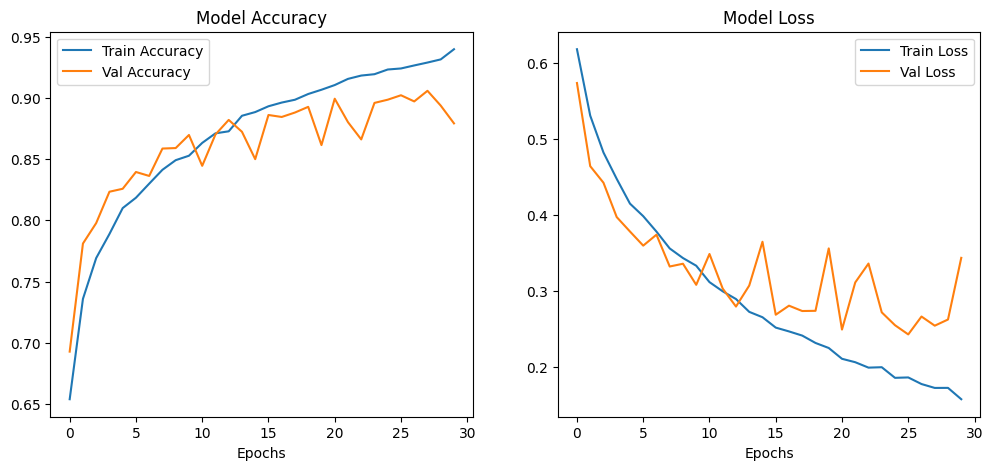

1/1 [==============================] - 0s 107ms/step


NameError: name 'class_names' is not defined

<Figure size 500x400 with 0 Axes>

In [ ]:
# ============================================================
# LOAD & PREPROCESS DATA
# ============================================================
data_dir = "Petimages"  # path to your dataset folder (contains 'Cat' and 'Dog')

# Hyperparameters
img_height, img_width = 128, 128
batch_size = 32
seed = 42


### Checking the GPU Availability

In [ ]:
# Check GPU availability
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

### Splitting the data for training and validation

In [ ]:
# Use image_dataset_from_directory to load images directly from folders
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


### Data Augmentation

In [ ]:
# ============================================================
# AUGMENTATION
# ============================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

### Normalization

In [ ]:
# Normalize pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Optimize performance (caching + prefetching)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## Building the CNN Model

In [ ]:
# ============================================================
#  BUILD CNN MODEL
# ============================================================
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# model.summary()


### Compiling the Model

In [ ]:
# ============================================================
# COMPILE MODEL
# ============================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training the Model

In [ ]:
# ============================================================
#  TRAIN MODEL
# ============================================================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)

### Visualizing the Performance

In [ ]:
# ============================================================
# VISUALIZE TRAINING PERFORMANCE
# ============================================================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")

plt.show()

In [ ]:
# ============================================================
# EVALUATION (CONFUSION MATRIX & CLASSIFICATION REPORT)
# ============================================================
# Get predictions on validation set
y_true = []
y_pred = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(preds).astype(int).flatten())

### Saving the Model

In [ ]:
# ============================================================
#  SAVE MODEL
# ============================================================
model.save("cats_vs_dogs_custom_cnn.h5")
print(" Model saved as cats_vs_dogs_custom_cnn.h5")

✅ Model saved as cats_vs_dogs_custom_cnn.h5


### Importing the Model

In [2]:
# Checking the model prediction and importing the model

from tensorflow.keras.models import load_model
model = load_model("cats_vs_dogs_custom_cnn.h5")

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

# Making the Prediction System 

In [4]:
# making the prediction system
import cv2
import numpy as np

# Load & preprocess image
img_path = "cat.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (128, 128))           # Must match training size
img = img / 255.0                           # Normalize to [0, 1]
img = np.expand_dims(img, axis=0)           # Add batch dimension

# Predict
pred = model.predict(img)
score = pred[0][0]  # Raw sigmoid output
confidence = score * 100 if score > 0.5 else (1 - score) * 100

print(f"Raw Prediction: {score:.4f}")
if score > 0.5:
    print(f"Prediction: Dog 🐶 ({confidence:.2f}% confident)")
else:
    print(f"Prediction: Cat 🐱 ({confidence:.2f}% confident)")



1/1 [==============================] - 0s 46ms/step
Raw Prediction: 0.0000
Prediction: Cat 🐱 (100.00% confident)


## 🖼️ Sample Results (Preview)

| Image | Prediction | Confidence |
|-------|-------------|-----------|
| <img src="cat.jpg" width="150"> | 🐱 Cat | **100.00%** |
| <img src="dog.jpg" width="150"> | 🐶 Dog | **99.99%** |